In [1]:
#import library
import cv2 #opencv image
import numpy as np #array
import string #text
import os
import matplotlib.pyplot as plt #visualization

In [2]:
#ASCII CONVERSION
d={chr(i):i for i in range(255)} #character to ascii
c={i:chr(i) for i in range(255)} #ascii to character

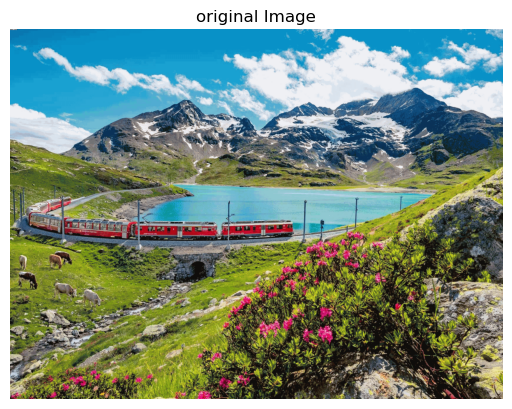

Image shape (Height, Width, Channels): (1500, 2000, 3)


In [9]:
#load the image (change path to your image)
image_path=r"C:\Users\pragn\OneDrive\Pictures\Saved Pictures\Swiss-Alps_-Zurich_banner.png"
x=cv2.imread(image_path)

#Convert to RGB for matplotlib visualization
x_rgb=cv2.cvtColor(x,cv2.COLOR_BGR2RGB)

#Show the original image
plt.imshow(x_rgb)
plt.title("original Image")
plt.axis('off')
plt.show()

#Display image shape
print("Image shape (Height, Width, Channels):", x.shape)

In [36]:
key="P17" # Example key
text="Chennai" #Message to hide

print("key:", key)
print("Text:", text)

key: P17
Text: Chennai


In [38]:
# Show ASCII Values of text and key
text_ascii=[d[ch] for ch in text] #list of ascii values of text characters
key_ascii=[d[ch] for ch in key] #list of ascii values of key

print("Text ASCII:", text_ascii)
print("key ASCII:", key_ascii)

Text ASCII: [67, 104, 101, 110, 110, 97, 105]
key ASCII: [80, 49, 55]


In [40]:
#Make a copy of image to modify
x_enc=x.copy()


n=0 #number of rows
m=0 #number of columns
z=0 #colour panel
l=len(text)
kl=0

#Encrypt and modify pixel values 
for i in range(l):
    orig_val=x_enc[n,m,z]
    new_val=d[text[i]]^d[key[kl]]
    x_enc[n,m,z]=new_val
    print(f"Embedding '{text[i]}' (ASCII {d[text[i]]}) XOR '{key[kl]}' (ASCII {d[key[kl]]}) = {new_val} at pixel ({n},{m},{z}) [original={orig_val}]")
   
    
    n=n+1
    m=m+1
    z=(z+1)%3
    m=(m+1)%3
    kl=(kl+1)%len(key)

Embedding 'C' (ASCII 67) XOR 'P' (ASCII 80) = 19 at pixel (0,0,0) [original=11]
Embedding 'h' (ASCII 104) XOR '1' (ASCII 49) = 89 at pixel (1,2,1) [original=13]
Embedding 'e' (ASCII 101) XOR '7' (ASCII 55) = 82 at pixel (2,1,2) [original=15]
Embedding 'n' (ASCII 110) XOR 'P' (ASCII 80) = 62 at pixel (3,0,0) [original=11]
Embedding 'n' (ASCII 110) XOR '1' (ASCII 49) = 95 at pixel (4,2,1) [original=119]
Embedding 'a' (ASCII 97) XOR '7' (ASCII 55) = 86 at pixel (5,1,2) [original=9]
Embedding 'i' (ASCII 105) XOR 'P' (ASCII 80) = 57 at pixel (6,0,0) [original=176]


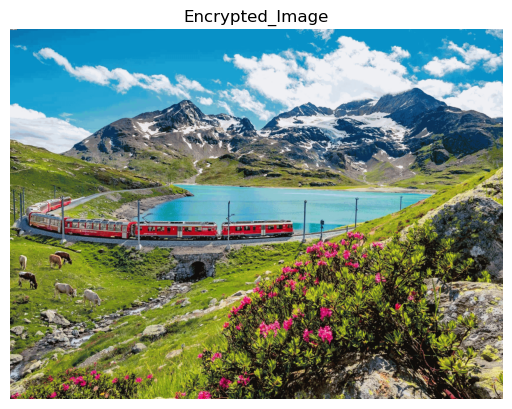

In [48]:
#Save encrypted image
cv2.imwrite("encrypt.jpg",x_enc)

#Show encrypted image
plt.imshow(cv2.cvtColor(x,cv2.COLOR_BGR2RGB))
plt.title("Encrypted_Image")
plt.axis('off')
plt.show()

In [50]:
C


C 

Decrypting pixel (0,0,0): 19 XOR 80 = 67 -> 'C'
Decrypting pixel (1,2,1): 89 XOR 49 = 104 -> 'h'
Decrypting pixel (2,1,2): 82 XOR 55 = 101 -> 'e'
Decrypting pixel (3,0,0): 62 XOR 80 = 110 -> 'n'
Decrypting pixel (4,2,1): 95 XOR 49 = 110 -> 'n'
Decrypting pixel (5,1,2): 86 XOR 55 = 97 -> 'a'
Decrypting pixel (6,0,0): 57 XOR 80 = 105 -> 'i'
Decrypted text: Chennai
